# Matriz de sumas constantes

En la siguiente figura, se deben colocar seis números entre el 1 y el 5 en los cuadrados, de manera que se cumplan las siguientes condiciones:

- La suma de los números en cada renglón debe ser la misma.
- La suma de los números en cada columna debe ser la misma.

Se han proporcionado algunos números en los cuadrados. **¿Puedes determinar qué número debe colocarse en el cuadro sombreado?**

<center>
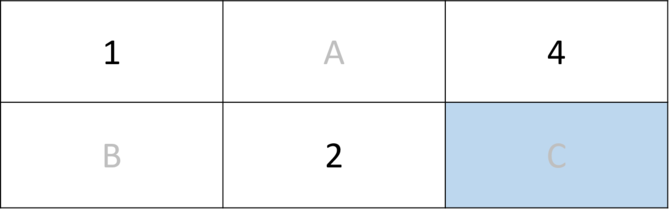
</center>

## Definición de variables

In [44]:
from itertools import product
from collections import deque

Definimos la clase *Variable* y asignamos los valores de dominio de acuerdo a lo establecido en las instrucciones $A,B,C \in$ { $1,2,3,4,5$ } 

In [45]:
class Variable:
    def __init__(self, id_, domain):
        self.id = id_
        self.domain = domain
    def __str__(self):
        return f'{self.id} -> {self.domain}'

In [46]:
values = [
    ['A', [1,2,3,4,5]],
    ['B', [1,2,3,4,5]],
    ['C', [1,2,3,4,5]]
]

In [47]:
variables = {}
for item in values:
    variables[item[0]] = Variable(*item)

In [48]:
for v in variables:
    print(f'{variables[v].id} -> {variables[v].domain}')

A -> [1, 2, 3, 4, 5]
B -> [1, 2, 3, 4, 5]
C -> [1, 2, 3, 4, 5]


## Definición de restricciones

Las restricciones de este problema se puede inferir a partir de las instrucciones del problema

En primer lugar se menciona que la suma de los renglones debe ser la misma, esto puede expresarse de la siguente forma:

$$1 + A + 4 = B + 2+ C$$

Posteriormente también se nos indica que la suma por columnas también debe ser equivalente. Y su expresión quedaría de la siguiente forma:
$$1 +B = A+2 = 4+C$$

Estas restricciones son las que definiremos usando la clase _Constraint_

In [49]:
def c1(A, B, C):
    if B+1 == A+2 and B+1 == C+4 and A+2 == C+4:
        return True
    else:
        return False
    
def c2(A, B, C):
    if A + 5 == B + C + 2:
        return True
    else:
        return False
    

In [50]:
class Constraint:
    def __init__(self, id_, rel_variables, func):
        self.id = id_
        self.related_variables = rel_variables
        self.function = func

In [51]:
constraints_values = [ ['C1', ['A','B','C' ], c1],
                       ['C2', ['A','B','C' ], c2],]

In [52]:
constraints = {}
for item in constraints_values:
    constraints[item[0]] = Constraint(*item)

## Reducción de dominio

Creamos todas las aristas *(X, C)* para todas las variables y restricciones

In [53]:
edges = []
for key in constraints:
    for var in constraints[key].related_variables:
        if (var, key) not in edges:
            edges.append((var, key))

Realizamos el algoritmo AC-3 para la consistencia de arco

In [54]:
edges_deque = deque(edges)
while(edges_deque):
    # Tomamos la primer arista (X, C)
    variable_name, constraint_name = edges_deque.popleft()
    
    # Iteramos sobre los valores del dominio de la variable seleccionada
    for value in list(variables[variable_name].domain):
        valid = False
        # Si existe alguna asignación de valores para todas las variables donde la variable seleccionada tome el valor que estamos evaluando y cumpla la restricción, hay arco-consistencia
        for combination in product(*[variables[v].domain if v != variable_name else [value] for v in constraints[constraint_name].related_variables]):
            if constraints[constraint_name].function(*combination):
                valid = True
                break
                
        # Si no hay asignaciones de valores válidas donde la variable tome el valor evaluado, no hay arco-consistencia 
        # Por lo tanto, eliminamos ese valor del dominio de la variable y agregamos las aristas que necesitamos volver a checar
        if not valid:            
            variables[variable_name].domain.remove(value)
            related_cons = [constraint for variable, constraint in edges if variable == variable_name]
            affected_edges = [(v, c) for v, c in edges if c in related_cons and v != variable_name]
            edges_deque += deque(affected_edges)


Imprimimos los valores restantes después de la reducción de dominio

In [55]:
for v in variables:
    print(f'{variables[v].id} -> {variables[v].domain}')

A -> [3, 4]
B -> [4, 5]
C -> [1, 2]


## Búsqueda

Ya que tenemos un dominio más reducidio, tenemos  un espacio de búsqueda más pequeño. Ahora tenemos que buscar la solución o soluciones al problema. Esta búsqueda se puede realizar de diferentes formas, a continuación muestro una forma simple sólo para ejemplificar el proceso. En este caso evaluamos las diversas asignaciones de valores para estas variables y evaluamos si estas cumplen con todas las restricciones a la vez. Aquellas combinaciones asignaciones que lo cumplan son soluciones al problema.

In [56]:
solutions = []

for combination in product(*[variables[v].domain for v in variables]):
    dict_values = dict(zip(variables.keys(), combination))

    if all([
        c1(dict_values['A'], dict_values['B'], dict_values['C']),
        c2(dict_values['A'], dict_values['B'], dict_values['C']),
    ]):
        solutions.append(dict_values)

Con esto finalmente obtenemos la solución o soluciones al problema

In [57]:
solutions

[{'A': 4, 'B': 5, 'C': 2}]